In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output, display
import time
from matplotlib.colors import ListedColormap, BoundaryNorm

In [13]:
class Person:
    def __init__(self, white, tolerance):
        self.white = white
        self.tolerance = tolerance
        self.happy = False
        
    def val(self):
        repr = None
        if self.white:
            if self.happy:
                repr = 1
            else:
                repr = 2
        else:
            if self.happy:
                repr = 3
            else:
                repr = 4
        return repr
    

In [14]:
def prepare_matrix(rows=50, cols=50, density=0.8, tolerance=0.5):
    n = int(rows * cols)    
    blacks = []
    whites = []
    for i in range(int((density / 2) * n)):
        blacks.append(Person(False, tolerance))
        whites.append(Person(True, tolerance))
    number_of_people = len(blacks) + len(whites)
    empty = np.full(n - len(blacks) - len(whites), 0)
    array = np.concatenate((blacks, whites, empty))
    np.random.shuffle(array)
    matrix = array.reshape((rows, cols))
    return matrix, number_of_people

In [15]:
def update_hapiness(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for row in range(rows):
        for col in range(cols):
            person = matrix[row, col]
            if not person:
                continue
            white = person.white
            same_color_neighbours = -1
            for i in range(-1, 2):
                for j in range(-1, 2):
                    neighbour = matrix[(row + i) % rows, (col + j) % cols]
                    if not neighbour:
                        continue
                    if not (neighbour.white ^ white):
                        same_color_neighbours += 1
            person.happy = (same_color_neighbours / 8) >= person.tolerance
    return matrix
    

In [16]:
def relocate_unhappy(matrix):

    rows = matrix.shape[0]
    cols = matrix.shape[1]
    unhappy = []
    empty_spots = []
    for row in range(rows):
        for col in range(cols):
            person = matrix[row, col]
            if not person:
                empty_spots.append((row, col))
            elif not person.happy:
                unhappy.append((person, (row, col)))
    np.random.shuffle(unhappy)
    np.random.shuffle(empty_spots)
    for unhappy_person in unhappy:
        matrix[empty_spots[-1][0], empty_spots[-1][1]] = unhappy_person[0]
        empty_spots.pop()
        matrix[unhappy_person[1]] = 0
        empty_spots.insert(random.randint(0, len(empty_spots)), unhappy_person[1])
    return matrix
    

In [17]:
def count_happy(matrix):
    n_happy = 1
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for row in range(rows):
        for col in range(cols):
            person = matrix[row, col]
            if not person:
                continue
            if person.happy:
                n_happy += 1
    return n_happy

In [18]:
def step(rep):
        rep = update_hapiness(rep)
        rep = relocate_unhappy(rep)
        return rep

In [19]:
def plot(matrix):
    # Create a numpy array for the colors
    color_matrix = []
    for row in matrix:
        new_row = []
        for cell in row:
            if isinstance(cell, Person):
                new_row.append(cell.val())
            else:
                new_row.append(0)
        color_matrix.append(new_row)    
    # Creaa figure and axis
    fig, ax = plt.subplots()

    # Create a colormap with custom colors
    cmap = ListedColormap(['white', 'red', '#FFCCCC', 'blue', '#CCCCFF'])

    # Calculate the ratio of elements in the matrix
    total_elements = np.prod(np.array(matrix).shape)
    ratio = np.sum(np.array(color_matrix) != 0) / total_elements

    # Set bounds to cover the range of values from -0.5 to 4.5
    bounds = np.arange(-0.5, 5.5, 1)

    # Use BoundaryNorm to make sure the colorbar corresponds to the boundaries of your categories
    norm = BoundaryNorm(bounds, cmap.N, clip=True)

    # Plot the color matrix
    cax = ax.matshow(color_matrix, cmap=cmap, norm=norm)

    # Display the plot
    plt.show()

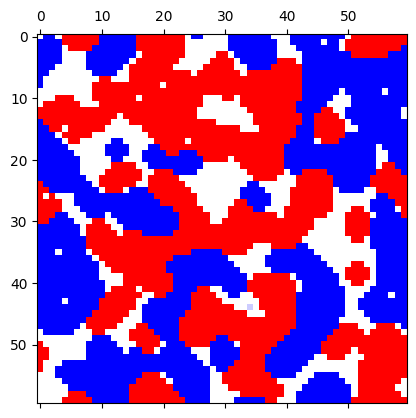

In [20]:
x, n = prepare_matrix(60,60,0.8,0.5)
happy_history = []
n_happy = 0
plot(x)
clear_output(wait=True)

time.sleep(3)
while True:
    happy_history.append(n_happy)
    x = step(x)
    n_happy = count_happy(x)
    plot(x)
    clear_output(wait=True)
    if n_happy == n:
        plot(x)
        break
plt.show()

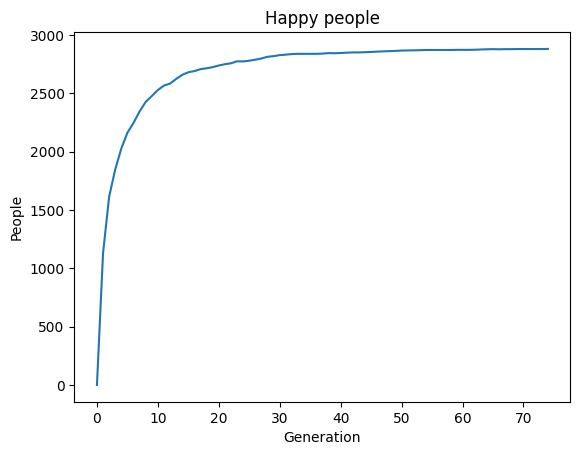

In [21]:
# Create x-axis values (assuming equal spacing)
x_values = np.arange(len(happy_history))

# Plot the values
plt.plot(x_values, happy_history, linestyle='-')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('People')
plt.title('Happy people')

# Display the plot
plt.show()